In [1]:
import os
import re
import sys

import skimage.io as skio
import matplotlib.pyplot as plt

import numpy as np
import os
import sys
from math import sqrt

import cv2
import pandas as pd

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split
from skimage.transform import rescale, resize, downscale_local_mean

import time

from PIL import Image
from skimage.feature import hog

from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf
from tensorflow import keras
from keras.utils import generic_utils
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.regularizers import l2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


import seaborn as sns

In [2]:
def ReadImageFolder(path):
    filepaths = [os.path.join(r,file) for r,d,f in os.walk(os.getcwd() + path) for file in f]
    ext = (".tif",".TIF",".jpg")
    filepaths = [x for x in filepaths if x.endswith(ext)]
    return filepaths

In [3]:
Labels = [ ]
Labels_String = [ "Motorbikes" ,"helicopter","airplanes","brain", "car_side","panda",
                 "chandelier", "cougar_face","crab","grand_piano"]

path = "/Dataset2Pattern/Motorbikes"
Motorbikes = ReadImageFolder(path)
for i in range(len(Motorbikes)):
  Labels.append(0)

path = "/Dataset2Pattern/helicopter"
helicopter = ReadImageFolder(path)
for i in range(len(helicopter)):
  Labels.append(1)

path = "/Dataset2Pattern/airplanes"
airplanes = ReadImageFolder(path)
for i in range(len(airplanes)):
  Labels.append(2)

path = "/Dataset2Pattern/brain"
brain = ReadImageFolder(path)
for i in range(len(brain)):
  Labels.append(3)

path = "/Dataset2Pattern/car_side"
car_side = ReadImageFolder(path)
for i in range(len(car_side)):
  Labels.append(4)

path = "/Dataset2Pattern/panda"
panda = ReadImageFolder(path)
for i in range(len(panda)):
  Labels.append(5)

path = "/Dataset2Pattern/chandelier"
chandelier = ReadImageFolder(path)
for i in range(len(chandelier)):
  Labels.append(6)


path = "/Dataset2Pattern/cougar_face"
cougar_face = ReadImageFolder(path)
for i in range(len(cougar_face)):
  Labels.append(7)

path = "/Dataset2Pattern/crab"
crab = ReadImageFolder(path)
for i in range(len(crab)):
  Labels.append(8)

path = "/Dataset2Pattern/grand_piano"
grand_piano = ReadImageFolder(path)
for i in range(len(grand_piano)):
  Labels.append(9)

Paths_Array= [ Motorbikes ,helicopter,airplanes,brain,
              car_side,panda, chandelier,
              cougar_face,crab,grand_piano]


In [4]:
def PrepareImagesArray(paths,AllImages_Array):

    for i in paths:
        
      img_arr = cv2.imread(i)[...,::-1] #convert BGR to RGB format
      img_size = 256
      img_arr = img_arr.astype(np.float64)
    # Reshaping images to preferred size
      img_arr = cv2.resize(img_arr, (img_size, img_size) , interpolation = cv2.INTER_CUBIC  ) 
      img_arr = (img_arr - img_arr.mean()) / (img_arr.std()) # Standardize
    
      AllImages_Array.append(img_arr)

In [5]:
AllImages_Array = [ ]
for i in Paths_Array:
  PrepareImagesArray(i,AllImages_Array)
AllImages_Array_np = np.array(AllImages_Array)

# Delete old images array
AllImages_Array = [ ]

In [7]:
Labels_encoded = to_categorical(Labels, num_classes = 10)

In [8]:
x_train , x_test , y_train , y_test = train_test_split(AllImages_Array_np , Labels_encoded, test_size=0.15)
x_train , x_valid , y_train , y_valid = train_test_split(x_train , y_train, test_size=0.18)
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("x_valid shape:",x_valid.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)
print("y_valid shape:",y_valid.shape)

# Delete images after splitting to save memory

#AllImages_Array_np = [ ]


In [ ]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='random_normal', 
                 padding='same', kernel_regularizer=l2(0.1), input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='random_normal', 
                 padding='same', kernel_regularizer=l2(0.1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='random_normal', 
                 padding='same', kernel_regularizer=l2(0.1)))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='random_normal', 
                 padding='same', kernel_regularizer=l2(0.1)))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='random_normal', 
                 padding='same', kernel_regularizer=l2(0.1)))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [ ]:
model.compile(optimizer= 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
epochs = 60  # for better result increase the epochs
batch_size = 16

In [ ]:
checkpoint_filepath = './tmp/checkpoint'
mc = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True)

In [ ]:
history = model.fit(x_train,y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (x_valid,y_valid),
                    steps_per_epoch=x_train.shape[0] // batch_size , callbacks=[es,mc])

In [ ]:
test_eval = model.evaluate(x_test, y_test, verbose=1)

In [9]:
model = Sequential()
model = keras.models.load_model("./content/Random2_Images_Model_Noogm.h5py")

In [10]:
# Save model before checkpoint (incase old model is needed)
model.save("Model_cells_test1_beforecheckpoint.h5py")
# Load the model with the best weights from the epochs
model.load_weights(checkpoint_filepath)
model.save("Model_test2_aftercheckpoint.h5py")
test_eval = model.evaluate(x_test, y_test, verbose=1)

11/11 [==============================] - 6s 46ms/step - loss: 0.1013 - accuracy: 0.9738


In [ ]:
# Loading best model we have saved
model = Sequential()
modelpath = "./content/Random2_Images_Model_oooh.h5py"
model = keras.models.load_model(modelpath)

In [47]:
test_eval = model.evaluate(x_test, y_test, verbose=1)

11/11 [==============================] - 0s 19ms/step - loss: 0.1292 - accuracy: 0.9680


In [20]:
AllImages_Array_np = [ ]

In [37]:
predicted_classes_all = model_2.predict(x_test)
predicted_classes_all = np.argmax(predicted_classes_all,axis=1)

In [38]:
True_classes_all = np.argmax(y_test,axis = 1) 

# Showing Outputs

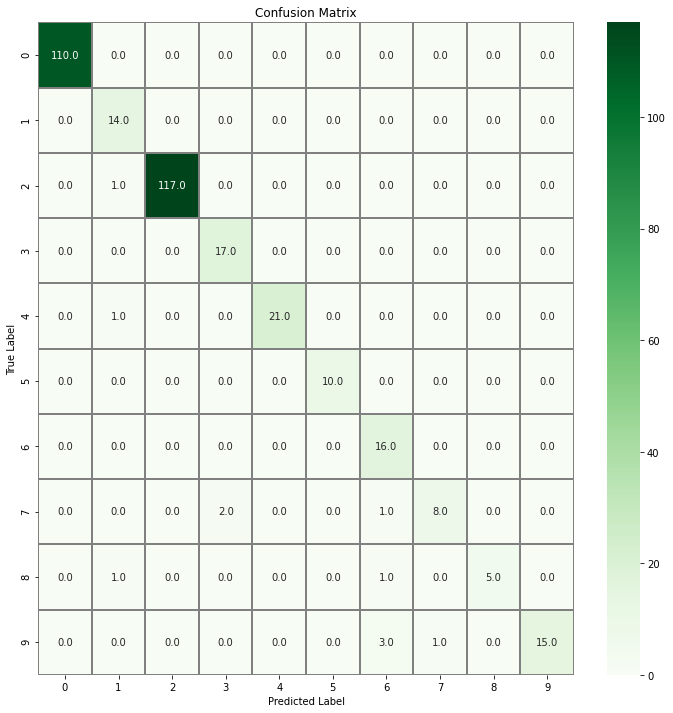

In [39]:
confusion_mtx = confusion_matrix(True_classes_all, predicted_classes_all) 
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [40]:
target_names = ["Class: {}".format(Labels_String[i]) for i in range(10)]
print(classification_report(True_classes_all, predicted_classes_all, target_names=target_names))

                    precision    recall  f1-score   support

 Class: Motorbikes       1.00      1.00      1.00       110
 Class: helicopter       0.82      1.00      0.90        14
  Class: airplanes       1.00      0.99      1.00       118
      Class: brain       0.89      1.00      0.94        17
   Class: car_side       1.00      0.95      0.98        22
      Class: panda       1.00      1.00      1.00        10
 Class: chandelier       0.76      1.00      0.86        16
Class: cougar_face       0.89      0.73      0.80        11
       Class: crab       1.00      0.71      0.83         7
Class: grand_piano       1.00      0.79      0.88        19

          accuracy                           0.97       344
         macro avg       0.94      0.92      0.92       344
      weighted avg       0.97      0.97      0.97       344



In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Showing samples from predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 333 correct labels


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


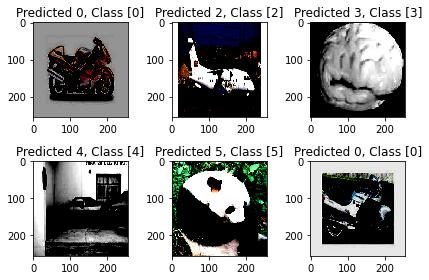

In [41]:
correct = np.where(predicted_classes_all==True_classes_all)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[78:84]):
    result=np.where(y_test[correct]==1)
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[correct].reshape(256,256,3), interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes_all[correct],result[0]))
    plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 11 Incorrect labels


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


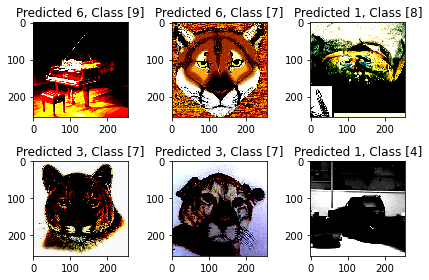

In [48]:
Incorrect = np.where(predicted_classes_all!=True_classes_all)[0]
print ("Found %d Incorrect labels" % len(Incorrect))
for i, Incorrect in enumerate(Incorrect[5:11]):
    result=np.where(y_test[Incorrect]==1)
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[Incorrect].reshape(256,256,3), interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes_all[Incorrect],result[0]))
    plt.tight_layout()

# CSV Output

In [44]:
Labels_output_true = [ ]
Labels_output_predicted = [ ]
for i in True_classes_all:
    Labels_output_true.append(Labels_String[i])
for i in predicted_classes_all:
    Labels_output_predicted.append(Labels_String[i])

In [45]:
IsIncorrect = [ ]
for i in range(len(True_classes_all)):
    if True_classes_all[i] != predicted_classes_all[i]:
        IsIncorrect.append("Incorrect Prediction")
    else:
        IsIncorrect.append("---")

In [46]:
data = {'Predicted Labels': Labels_output_predicted ,
        'True Labels': Labels_output_true ,
        'Is Predicted Label Incorrect?': IsIncorrect}

df = pd.DataFrame(data)
df.index = np.arange(1, len(df)+1)

df.to_csv("TestOutputUsingNon_Augmented_Model_Colored.csv", index_label = "Index")